In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ytube = pd.read_csv('C:\\Users\\HP\\Desktop\\Gokila\\Data Cleaning\\top-5000-youtube-channels.csv')
ytube.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


# Data Cleaning Process

In [3]:
ytube.isnull().sum()
#Hence no missing values found

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

In [4]:
ytube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [5]:
###Will change datatypes of Rank,Grade,Video Uploads,Subscribers to Numerical Datatype

In [6]:
ytube['Rank'] = ytube['Rank'].str[0:-2].str.replace(',','').astype('int')

In [7]:
ytube.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,4996,B+,Uras Benlioğlu,706,2072942,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,4998,B+,Mastersaint,110,3265735,311758426
4998,4999,B+,Bruce McIntosh,3475,32990,14563764
4999,5000,B+,SehatAQUA,254,21172,73312511


In [8]:
 mask1 = ytube[ytube['Subscribers'].str.contains('-')].index
# So we have drop cells with sign -- after which Subscribers column can be numerical

In [9]:
ytube.drop(labels=mask1,axis=0,inplace=True)

In [10]:
ytube.shape

(4613, 6)

In [11]:
ytube['Subscribers'] = ytube['Subscribers'].astype('int')

In [12]:
ytube['Rank'] = ytube['Rank'].astype('int')

In [13]:
ytube.info()
#Hence Subscribers and Rank is now completely converted into Numerical Data.Let's convert Video Uploads and Grade now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4613 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           4613 non-null   int32 
 1   Grade          4613 non-null   object
 2   Channel name   4613 non-null   object
 3   Video Uploads  4613 non-null   object
 4   Subscribers    4613 non-null   int32 
 5   Video views    4613 non-null   int64 
dtypes: int32(2), int64(1), object(3)
memory usage: 216.2+ KB


In [14]:
ytube['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ ', '\xa0 '], dtype=object)

In [15]:
channel_map = {'A++ ':5,'A+ ':4,'A ':3,'A- ':2,'B+ ':1}

In [16]:
ytube['Grade'] = ytube['Grade'].map(channel_map)

In [17]:
ytube['Grade'].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [18]:
ytube.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,5.0,Zee TV,82757,18752951,20869786591
1,2,5.0,T-Series,12661,61196302,47548839843
2,3,5.0,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,5.0,SET India,27323,31180559,22675948293
4,5,5.0,WWE,36756,32852346,26273668433


In [19]:
 mask2 = ytube[ytube['Video Uploads'].str.contains('-')].index

In [20]:
ytube.drop(labels=mask2,axis=0,inplace=True)

In [21]:
ytube['Video Uploads'] = ytube['Video Uploads'].astype('int')

In [22]:
ytube.info()
#Hence task Completed !!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4610 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           4610 non-null   int32  
 1   Grade          4610 non-null   float64
 2   Channel name   4610 non-null   object 
 3   Video Uploads  4610 non-null   int32  
 4   Subscribers    4610 non-null   int32  
 5   Video views    4610 non-null   int64  
dtypes: float64(1), int32(3), int64(1), object(1)
memory usage: 198.1+ KB


In [23]:
ytube.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,5.0,Zee TV,82757,18752951,20869786591
1,2,5.0,T-Series,12661,61196302,47548839843
2,3,5.0,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4,5.0,SET India,27323,31180559,22675948293
4,5,5.0,WWE,36756,32852346,26273668433


In [43]:
df=ytube.sort_values('Video Uploads',ascending=False)
df.head()
#Hence we can find out Channels with maximum no of Video Uploads,Subscribers,Video views by various imbuilt functions

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
3453,3454,1.0,AP Archive,422326,746325,548619569
1149,1150,2.0,YTN NEWS,355996,820108,1640347646
2223,2224,1.0,SBS Drama,335521,1418619,1565758044
323,324,3.0,GMA News,269065,2599175,2786949164
2956,2957,1.0,MLB,267649,1434206,1329206392


In [40]:
df1 = ytube.groupby(['Grade']).agg({'Video Uploads':'max','Subscribers':'max','Video views':'max'})

In [41]:
df1.head()

,Video Uploads,Subscribers,Video views
Grade,,,
1.0,422326,34480357,6841746256
2.0,355996,65995310,18684630003
3.0,269065,34489432,17806717170
4.0,186194,39409726,19291034467
5.0,100147,61196302,47548839843


In [51]:
df1.reset_index(inplace=True)

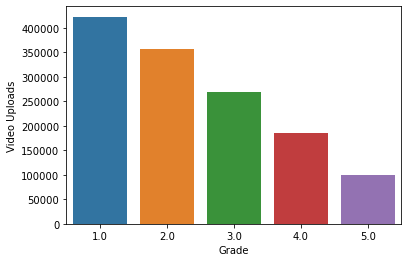

In [53]:
sns.barplot(x='Grade',y='Video Uploads',data=df1)
#Relationship between Grades with Maximum no of Video Uploads